# Author : Akash Dasgupta

This notebook comprises of a dataset known as wine quality prediction. The analysis we will perform over here is to predict the wine quality.
Let's have a little bit of information of the dataset.

## Wine Quality Dataset
Here the datasets are related to red and white wine, which are the two variants of the Portuguese "Vinho Verde Wine".
This dataset can be used to classification or regression task.
Let us look at the features or the input variables which we will be playing around.

### Attribute Information -:
 Input Variables
 
 1) fixed acidity 
 2) volatile acidity 
 3) citric acid
 4) residual sugar
 5) chlorides
 6) free sulphur dioxide
 7) total sulphur dioxide
 8) density
 9) pH
 10) sulphates
 11) alchohol
 
 Output Variable
 12) quality (range between 0-10)
 
 ## Import modules
 
 The modules are used below, if in case not installed just run this command on the terminal or Anaconda Navigator.
 !pip install "Module name".
 1) Numpy -: for numerical operations.
 2) pandas -: for creating dataframe out of csv, as by reading a csv file.
 3) seaborn -: for graphical representations.
 4) matplotlib -: for graphical representations.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

## Load the dataset

Dataset is being loaded using pd.read_csv() function as we have the dataset in csv format. Then we will display some of the data from the head and tail or from the beginning or last, by specifying data.head() and data.tail() function. By passing a numerical value as the parameters we can give or tell the machine, the number of rows to load on.

In [3]:
data = pd.read_csv(r'winequality-white.csv')

In [4]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
data.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


Let's us now look at the statistical information using the describe function.

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


We can look at the count values we see every column has 4898 values, it means there is no null values present. Now lets us look to the datatype information, by having data.info() it will also show us the non-null values and the datatype.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## Preprocessing the data

First we will check for the null values by using data.isnull().sum() function will tell us how many total null values are present. 

In [9]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Hence, here are no missing values. If there occurs any missing values we would have filled using the mean as the data set is completely of numerical set of structures.
Run the below code if any missing values is found (if any) by removing the '#'.

In [10]:
# filling missing values
#for col, value in data.items():
#    if col != 'type':
#        data[col] = data[col].fillna(data[col].mean())

## Exploratory Data Analysis

### Box plots

Let us first create some boxplots, to check some outliers. Boxplots can be plot using the seaborn library, using sns.boxplots.
As here we have 12 numericals columns we will subplot or divide into 2x6 grids.

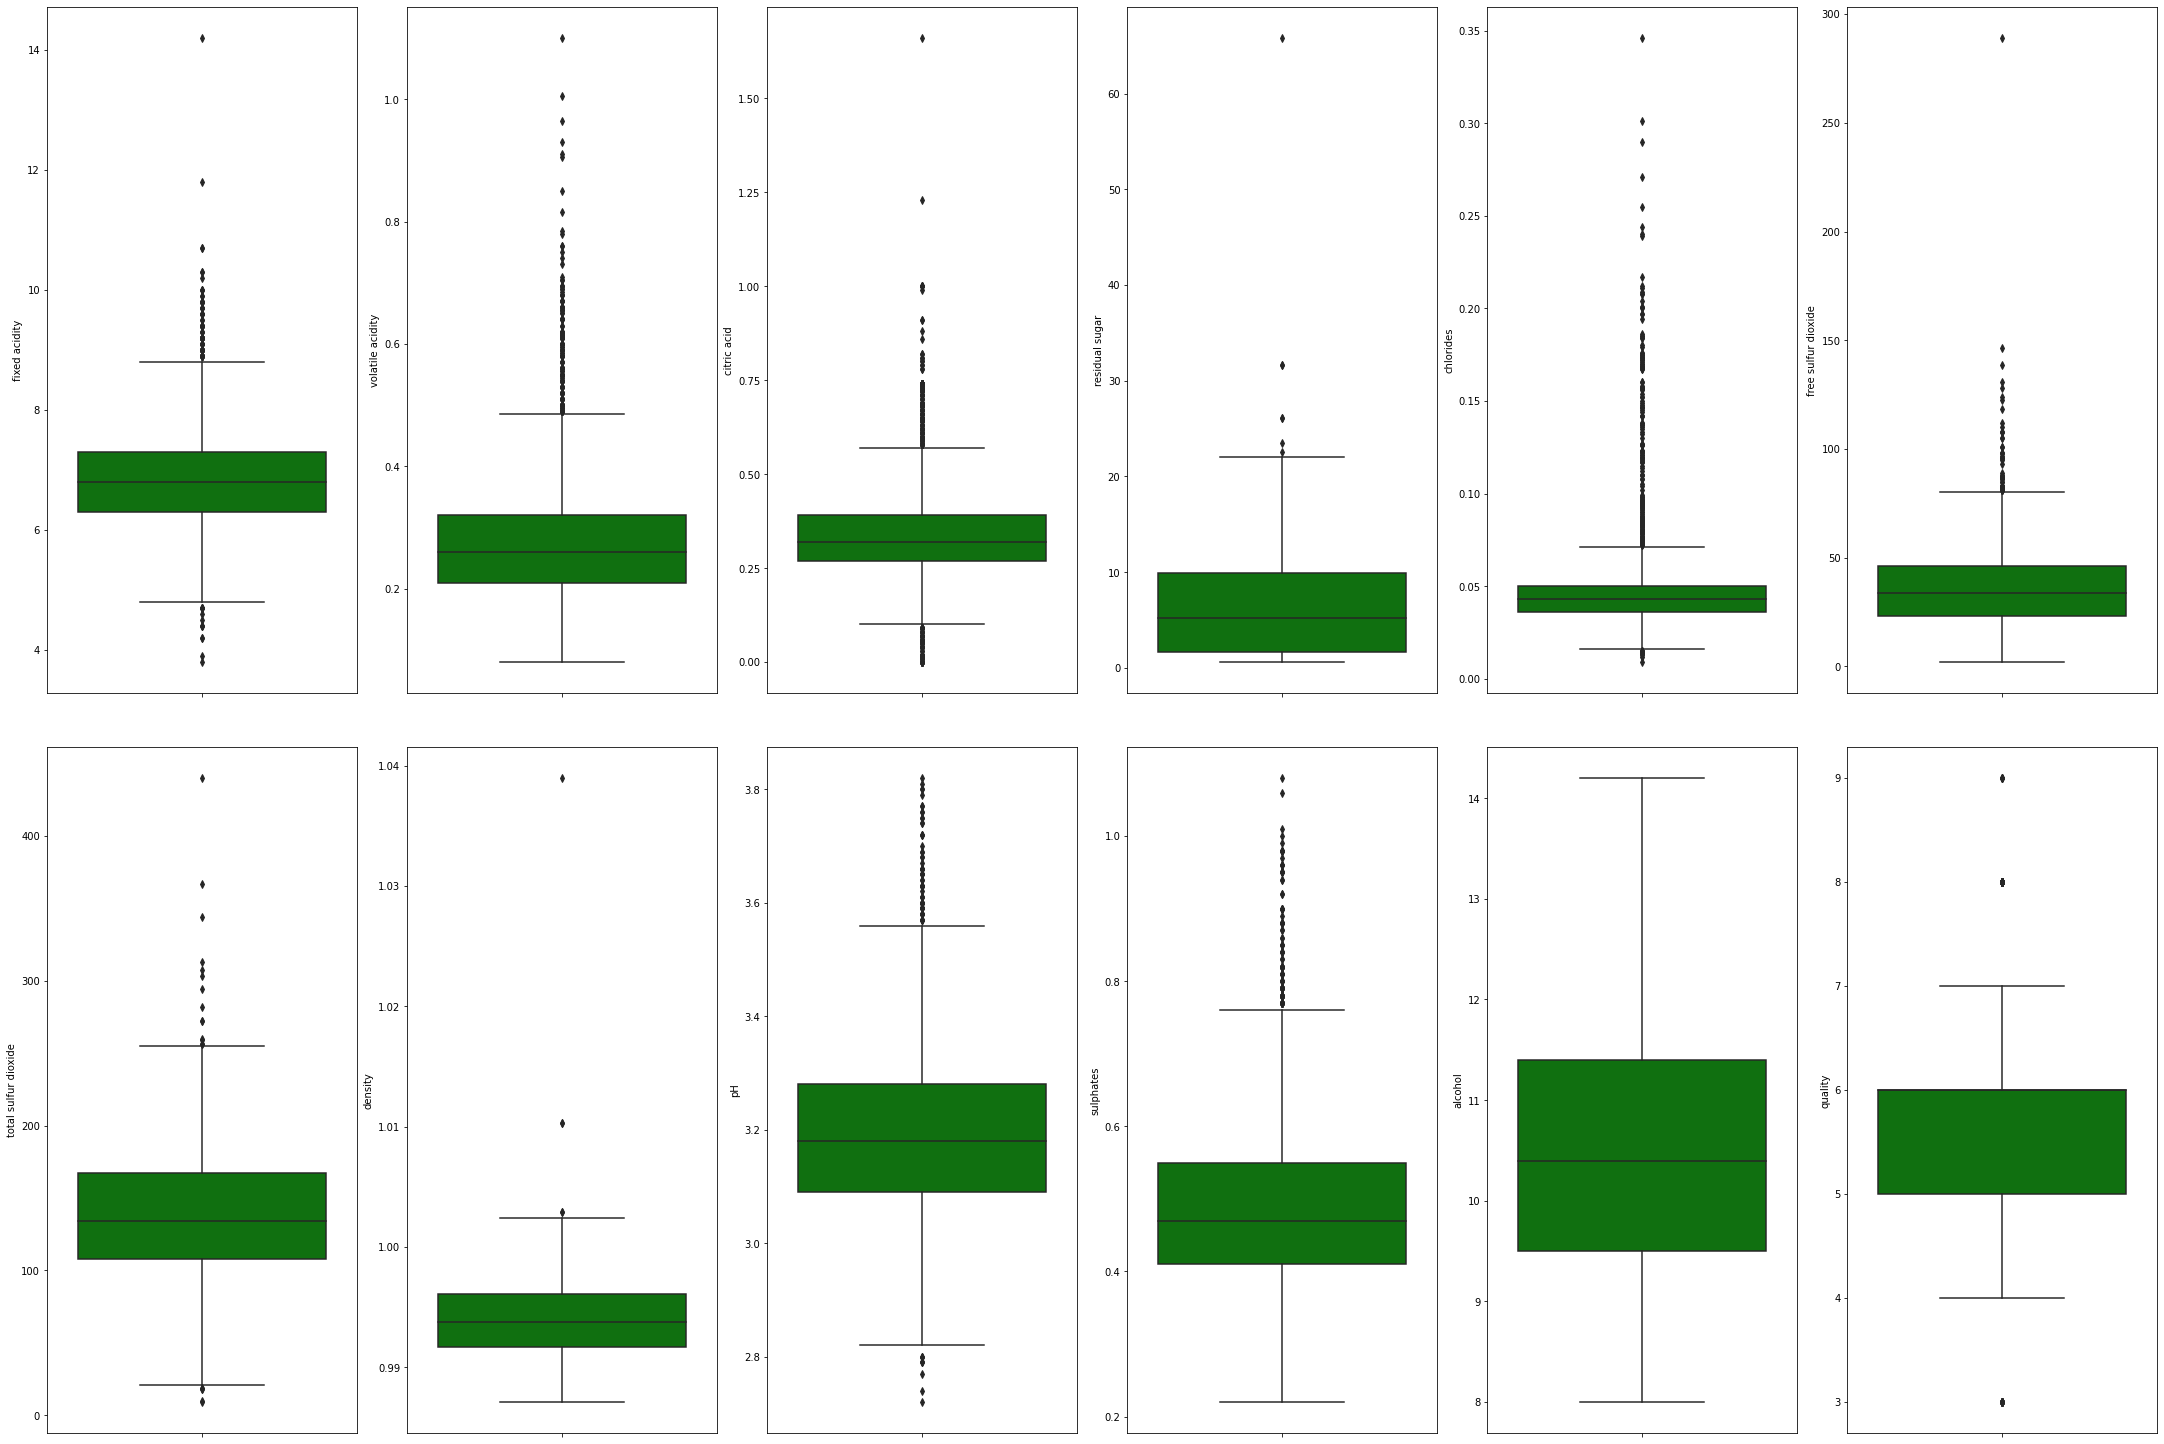

In [11]:
fig ,ax = plt.subplots(ncols=6, nrows =2, figsize=(30,20))
index = 0
ax =ax.flatten()

for col,value in data.items():
    if col !='type':# Using this if any object type is faced we must ignore the column
        sns.boxplot(y=col, data=data, ax = ax[index],color ='g') #plotting box plotsas it only has the y-axis, setting axis y to col 
                                                      #and data also the axis index
        index +=1 # We used this line to move to the next column
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

The positions of the dots shows the outliers, if we have continious dots we can ignore that, but if the dots are far away we need to remove those outliers. By removing outliers we can maintain the model accuracy by few percents but won't make that much difference.
Hence, if you want you can remove the outliers from 
1 Density
2 Citric acid
3 Residual sugar
4 Chlorides


So, lets remove the outliers from the above data. At first we have to calculate the statistics of the above variables, let's explore them.

In [12]:
print(data['density'].describe())
print(data['citric acid'].describe())
print(data['residual sugar'].describe())
print(data['chlorides'].describe())


count    4898.000000
mean        0.994027
std         0.002991
min         0.987110
25%         0.991723
50%         0.993740
75%         0.996100
max         1.038980
Name: density, dtype: float64
count    4898.000000
mean        0.334192
std         0.121020
min         0.000000
25%         0.270000
50%         0.320000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64
count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual sugar, dtype: float64
count    4898.000000
mean        0.045772
std         0.021848
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64


Here, we have many methods to remove the outliers hence, we will now replace the values which are greater than Q3 (i.e 75% of the data or the third quartile) with the value of Q3

In [13]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [14]:
data['density'] = np.where(data['density']>= 0.996100, 0.996100, data['density'])
data['citric acid'] = np.where(data['citric acid']>= 0.39, 0.39, data['citric acid'])
data['residual sugar'] = np.where(data['residual sugar']>=9.9, 9.9, data['residual sugar'])
data['chlorides'] = np.where(data['chlorides']>=0.05, 0.05, data['chlorides'])

In [15]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,9.9,0.045,45.0,170.0,0.99610,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.39,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.050,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.050,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


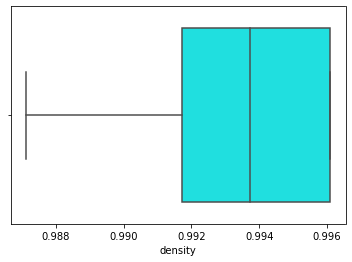

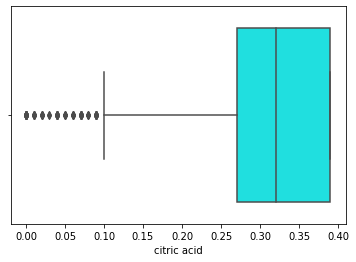

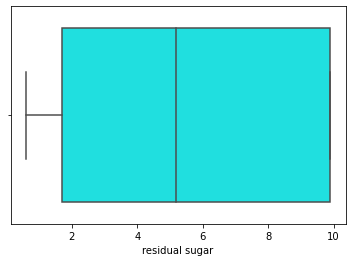

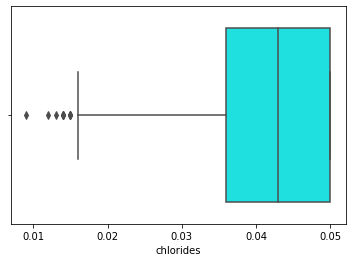

In [16]:

key = ['density','citric acid','residual sugar', 'chlorides']
for items in key:
    sns.boxplot(x=data[items],data=data,color='cyan')
    #sns.boxplot(x=data['citric acid'],data=data)
    #sns.boxplot(x=data['residual sugar'],data=data)
    #sns.boxplot(x=data['chlorides'],data=data)
    plt.show()

Therefore, by the above boxplots we have seen that how we can remove the outliers, we can also remove the outliers from the bottom, likewise we removed from the top, as we used here the Q3 values to replace for bottom we will be using the Q1 (i.e the first quartile values) to replace values less than Q1

### Distribution plots

Let's plot the distribution plot to check the normal distributions, setting the kde(Kernel Density Estimation) to be true.
As here we are dealing with the set of data, the main thing is to plot a Histogram. Histogram tells how the variables are distributed and it is represented using bins.

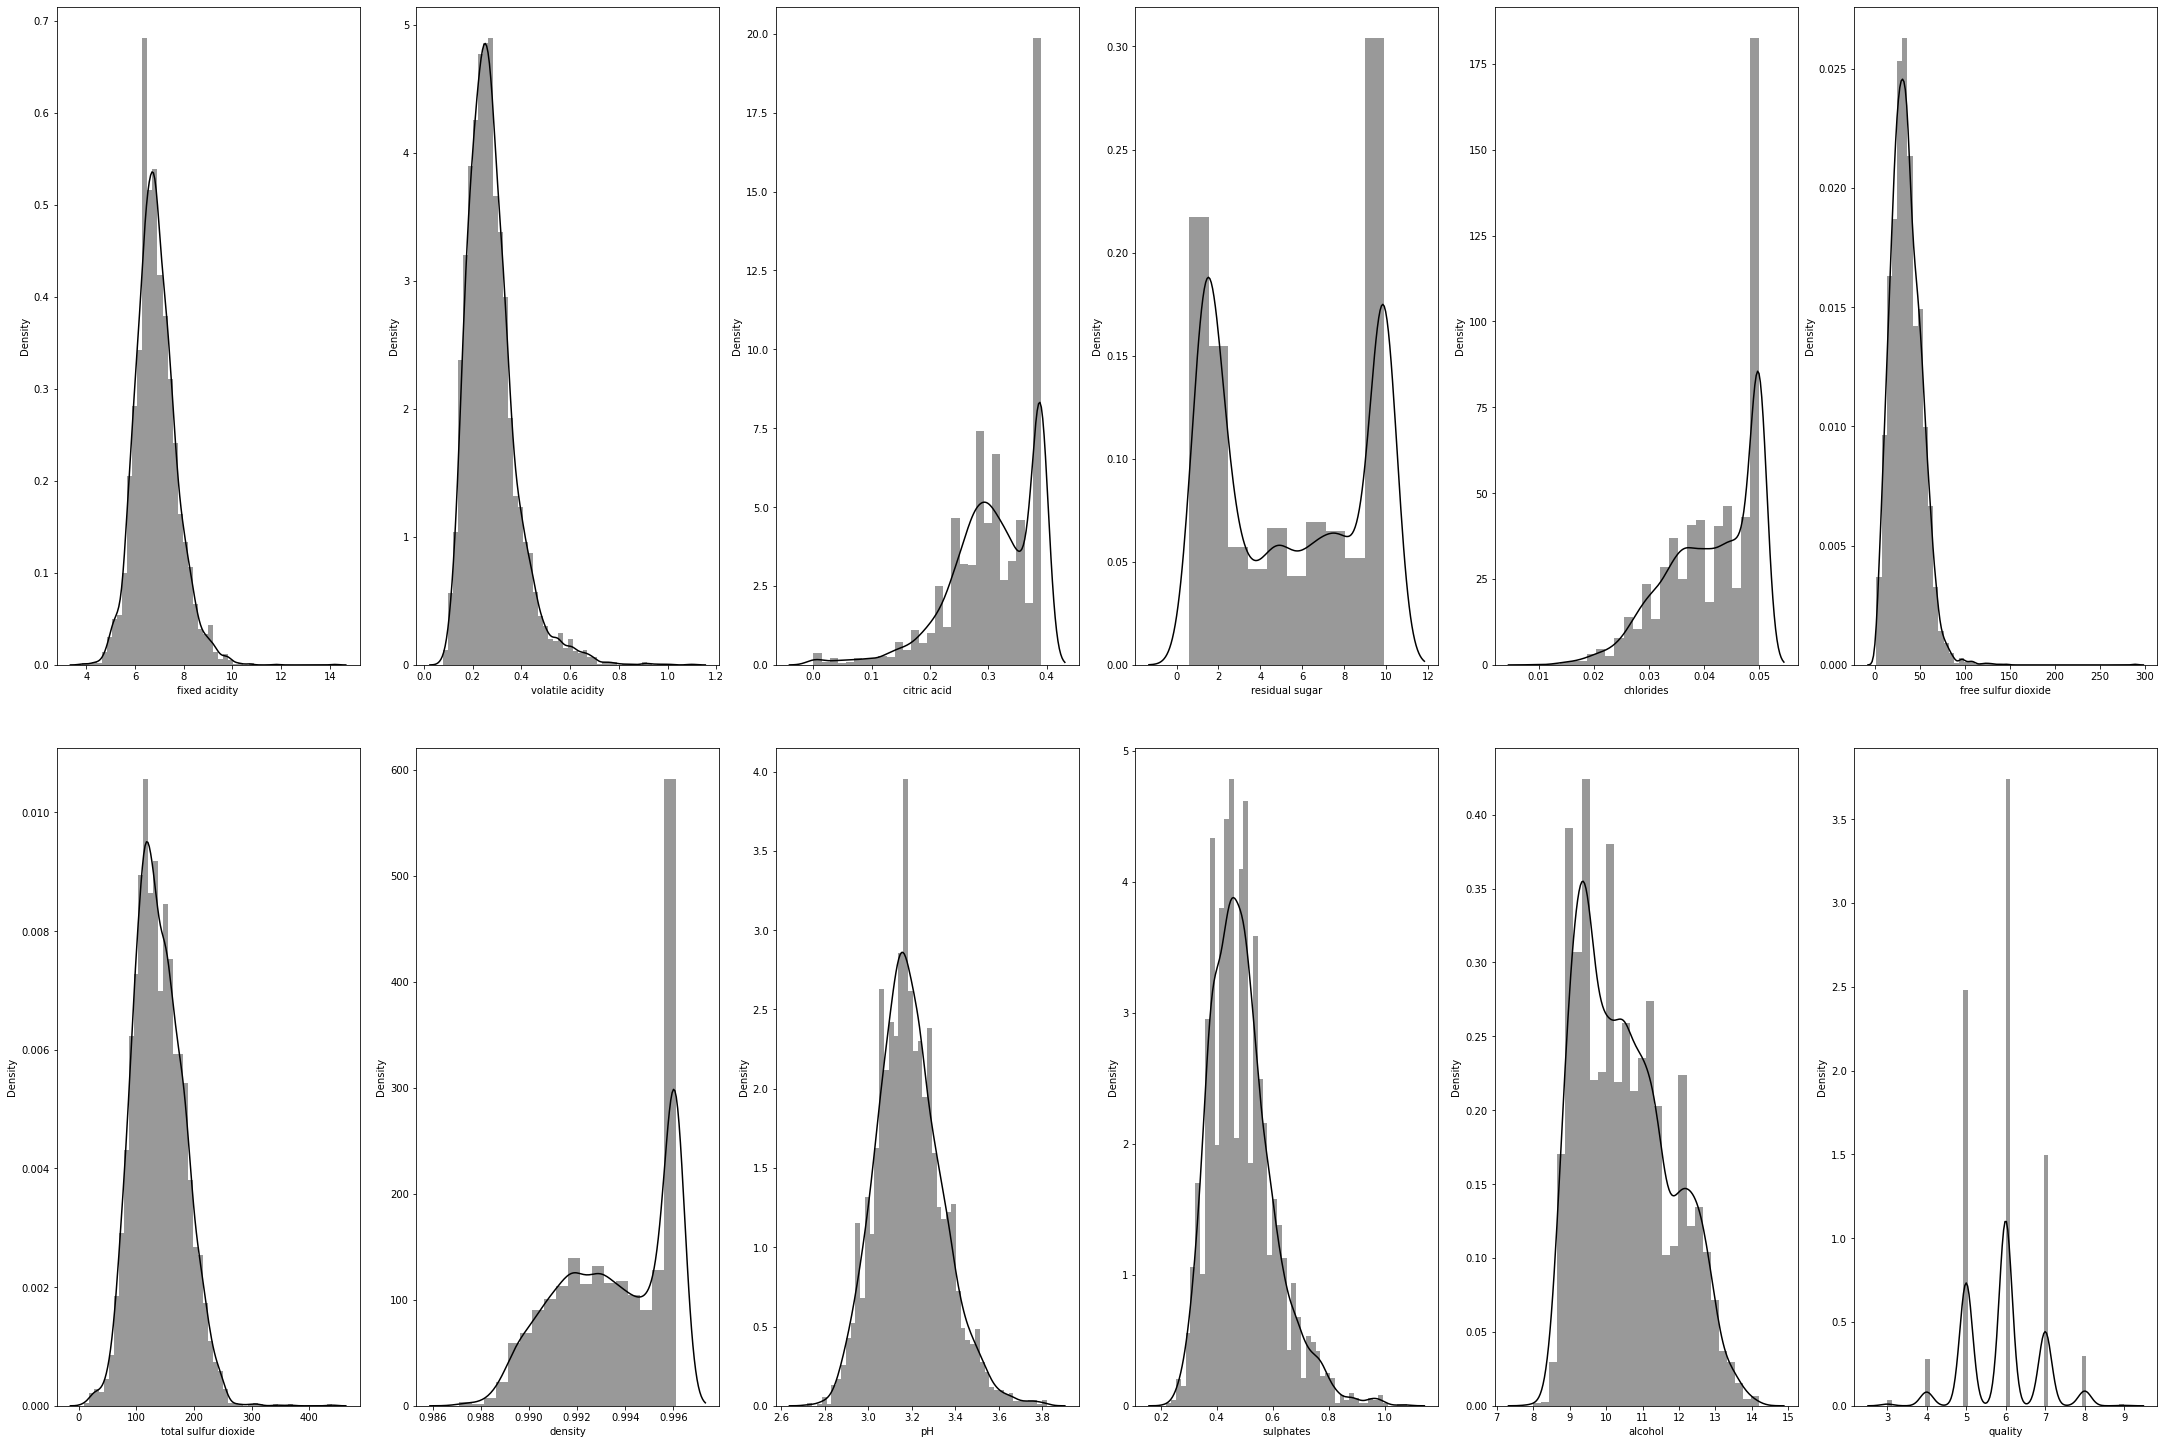

In [17]:
fig, axs = plt.subplots(ncols = 6,nrows = 2,figsize = (30,20))
index = 0
axs = axs.flatten()
for col, value in data.items():
    if col != 'type':
        sns.distplot(value, color='k',ax=axs[index],kde=True)
        index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)        

We can see that the data is well distributed and we don't need to change any of the distribution and the value range is also very less.

we see here the free sulphur dioxide is in a very much vig range, so we will do some log transformations.

In [18]:
# Here 1 is used to ignore some errors as log values does not supports zeros.
data['free sulfur dioxide'] = np.log(1 + data['free sulfur dioxide'] )


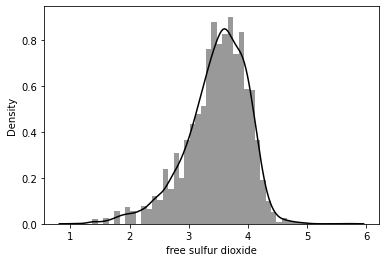

In [19]:
sns.distplot(data['free sulfur dioxide'], kde =True, color='k')
plt.show()

Hence now we can see it is in the uniform distributions as we can see a bell like curve, and before it was right skewed values.

### Countplot
Let's us see how much data set per quality range in the dataset
by using the countplot function from the seaborn library
By setting the parameters to to the type column in the dataframe.

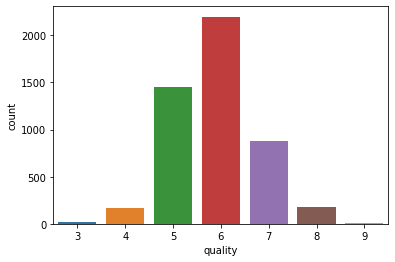

In [20]:
sns.countplot(x = data['quality'])
plt.show()

Now here we can see that 5,6 and 7 has much more values than all the other classes, so the whole model will be biased to these three classes only.
Hence  we have class imbalancement as we have classes different types of values

## Coorelation Martix

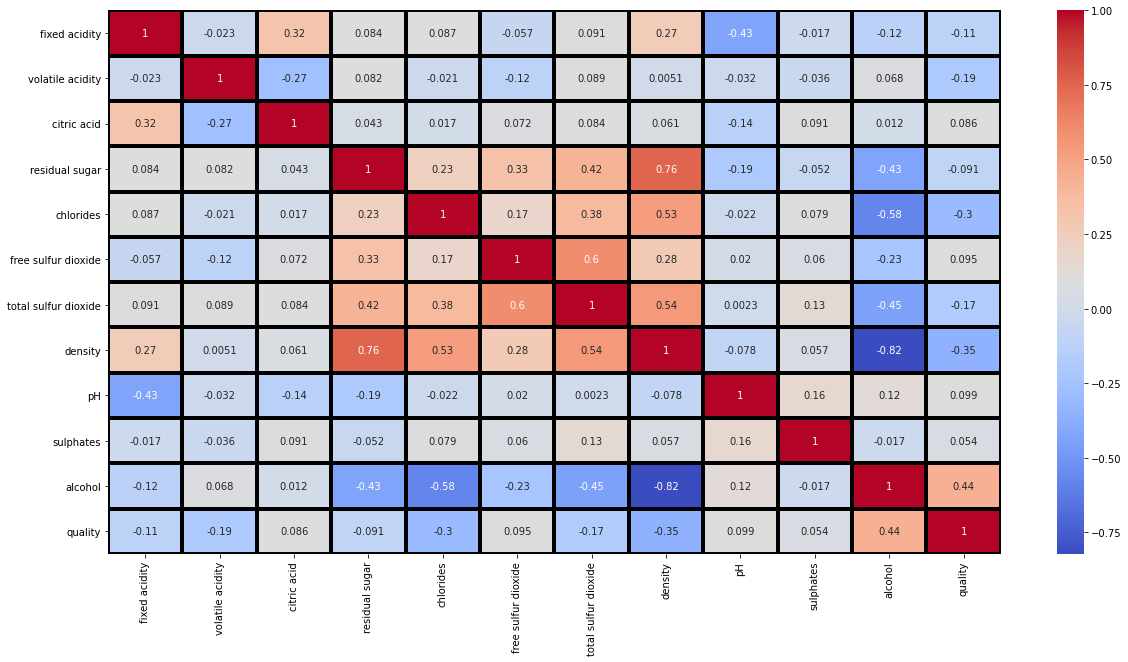

In [21]:
corr =  data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=3, linecolor='black')
plt.show()

## Splitting

Splitting and Normalizing the data into X and Y that is inputs and outputs.

In [22]:
x = data.drop(columns = ['quality'])

In [23]:
y = data['quality']

## Normalizing the Data

In [24]:
x_data = x.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0)-x.min(axis=0)))

In [25]:
x_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.307692,0.186275,0.923077,1.000000,0.878049,0.597215,0.373550,1.000000,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.871795,0.107527,0.975610,0.352077,0.285383,0.766407,0.527273,0.313953,0.241935
2,0.413462,0.196078,1.000000,0.677419,1.000000,0.510881,0.204176,0.888765,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.820513,0.849462,1.000000,0.606525,0.410673,0.944383,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.820513,0.849462,1.000000,0.606525,0.410673,0.944383,0.427273,0.209302,0.306452


## Model Training

Now we will create our model using the scikit learn and then run the regression flow through it and also print the accuracy, the wine quality our regression model will predict. Let's start with importing the libraries for the model creations.
The train test split will help us to split the data inro train and testing section, and as we will dealwith linear regression, hence we will import from scikit learn the LinearRegression Module.
Metrics from scikit learn will help us to plot the accuracy, that how much accurate our model is.
So, let's start with the predictions.

In [26]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

In [27]:
#Here we will be splitting the x and y data into training and testing.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

Once the data are splitted, it is time to build your Linear Regression model. You can simply use the built-in function to create a model and then fit to training data. Once trained, coef_gives the values of the coefficients for each feature.

In [28]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)
  
# this gives the coefficients of the features selected above.  
print(regressor.coef_)

[ 7.27597320e-02 -1.73898065e+00  3.85720327e-01  9.57453521e-02
 -3.57030616e+00  3.25039108e-01 -2.28333056e-03 -1.81832445e+02
  7.35594404e-01  6.36162505e-01  1.42506872e-01]


In [29]:
# Predicting the values
train_pred = regressor.predict(x_train)
print(train_pred)
test_pred = regressor.predict(x_test) 
print(test_pred)

[5.63553576 5.63217635 5.50673494 ... 6.06419647 6.81752549 5.72291616]
[5.48668373 5.59763421 5.95350543 ... 5.55332677 6.12760456 5.4615084 ]


In [30]:
#Printing the accuracy
print("Accuracy", regressor.score(x_test,y_test)*100)

Accuracy 28.8471385648558


##**Improving accuracy with custom complex models from tensorflow.**

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

In [36]:
def base_model(inputs):
  x = tf.keras.layers.Dense(units =128, activation='relu')(inputs)
  x = tf.keras.layers.Dense(units=128,activation='relu')(x)
  return x

def final_model(inputs):
  x = base_model(inputs)
  wine_quality = Dense(units=1,name='wine_quality')(x)
  model = Model(inputs=inputs, outputs=wine_quality)
  return model  


In [45]:
inputs = tf.keras.layers.Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(lr= 0.0001)
model= final_model(inputs)
model.compile(optimizer=rms,loss={'wine_quality' : 'mse'},metrics={'wine_quality': tf.keras.metrics.RootMeanSquaredError()})

In [46]:
history = model.fit(x_train,y_train,epochs = 100, validation_data=(x_test,y_test))

Epoch 1/100
115/115 [==============================] - 1s 3ms/step - loss: 14.9951 - root_mean_squared_error: 3.5144 - val_loss: 1.3013 - val_root_mean_squared_error: 1.1407
Epoch 2/100
115/115 [==============================] - 0s 2ms/step - loss: 1.0039 - root_mean_squared_error: 1.0008 - val_loss: 0.6707 - val_root_mean_squared_error: 0.8189
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 0.8710 - root_mean_squared_error: 0.9326 - val_loss: 0.7742 - val_root_mean_squared_error: 0.8799
Epoch 4/100
115/115 [==============================] - 0s 2ms/step - loss: 0.8176 - root_mean_squared_error: 0.9041 - val_loss: 0.7263 - val_root_mean_squared_error: 0.8523
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 0.8000 - root_mean_squared_error: 0.8943 - val_loss: 0.7562 - val_root_mean_squared_error: 0.8696
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 0.7411 - root_mean_squared_error: 0.8606 - val_loss: 0.7309

In [50]:
wine_quality_loss, wine_quality_rmse= model.evaluate(x=x_test, y=y_test)

print()
#print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')


39/39 [==============================] - 0s 899us/step - loss: 0.5597 - root_mean_squared_error: 0.7482

wine_quality_loss: 0.5597336292266846
wine_quality_rmse: 0.7481535077095032


In [51]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

In [52]:
def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

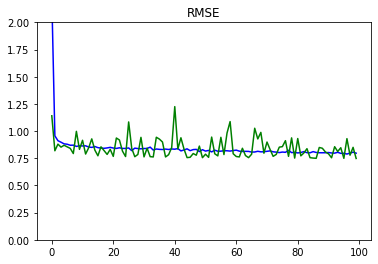

In [60]:
plot_metrics('root_mean_squared_error', 'RMSE', ylim=2)

Now, after training the model with the functional API from the tensorflow, let us predict how the model is actually performing.

By having the 1st prediction of the wine quality dataset,
the expected output should be in between 5.0-6.0  

In [62]:
predictions = model.predict(x_test)
quality_pred = predictions[0]
print(quality_pred[0])

5.6459866


This is how we can make out models using **Deep Learning** concepts, and it will definitely help out to increase the prediction accuracy.